In [1]:
import gym
from ppo import PPOAgent
from ActionNormalizer import (ActionNormalizer)
import matplotlib.pyplot as plt

### CartPole-v1

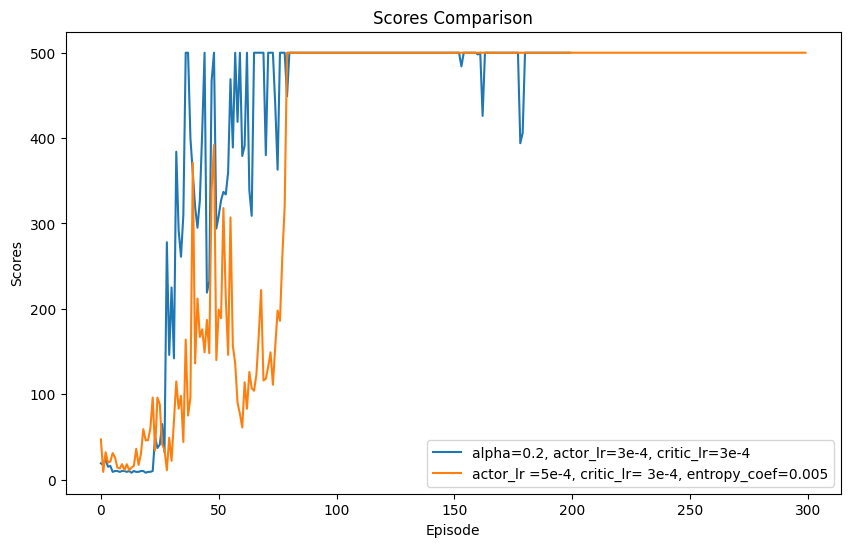

In [2]:
#graph of best parameters PPO and SAC

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = 'Common Plots\cartpole1_sac_ppo.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Step 2: Extract columns
scores = data[['scoreSAC', 'scorePPO']]

# Define labels for each score
labels = [
    "alpha=0.2, actor_lr=3e-4, critic_lr=3e-4",
    "actor_lr =5e-4, critic_lr= 3e-4, entropy_coef=0.005",
]

# Step 3: Plot the values
plt.figure(figsize=(10, 6))
for column, label in zip(scores.columns, labels):
    plt.plot(scores.index, scores[column], label=label)

# Add titles and labels
plt.title('Scores Comparison')
plt.xlabel('Episode')
plt.ylabel('Scores')
plt.legend(loc='lower right')  # Move legend to the lower left

# Show plot
plt.show()


Playing with learning_rates and entropy coeff and vf_coeff:

Score 1: actor_lr =5e-4, critic_lr= 3e-4, entropy_coef=0.005
Score 2: actor_lr =1e-4, critic_lr= 1e-4, entropy_coef=0.005
Score 3: actor_lr =1e-4, critic_lr= 3e-3, entropy_coef=0.01

THEN playing with rollout and batch size:

Score 4: rollout_len=2048 (Paper) and batch=4
Score 5: rollout_len=2048 (Paper) and batch=8
Score 6: rollout_len=2048 (Paper) and batch=16
Score 7: rollout_len=2048 (Paper) and batch=32
Score 8: rollout_len=2048 (Paper) and batch=64

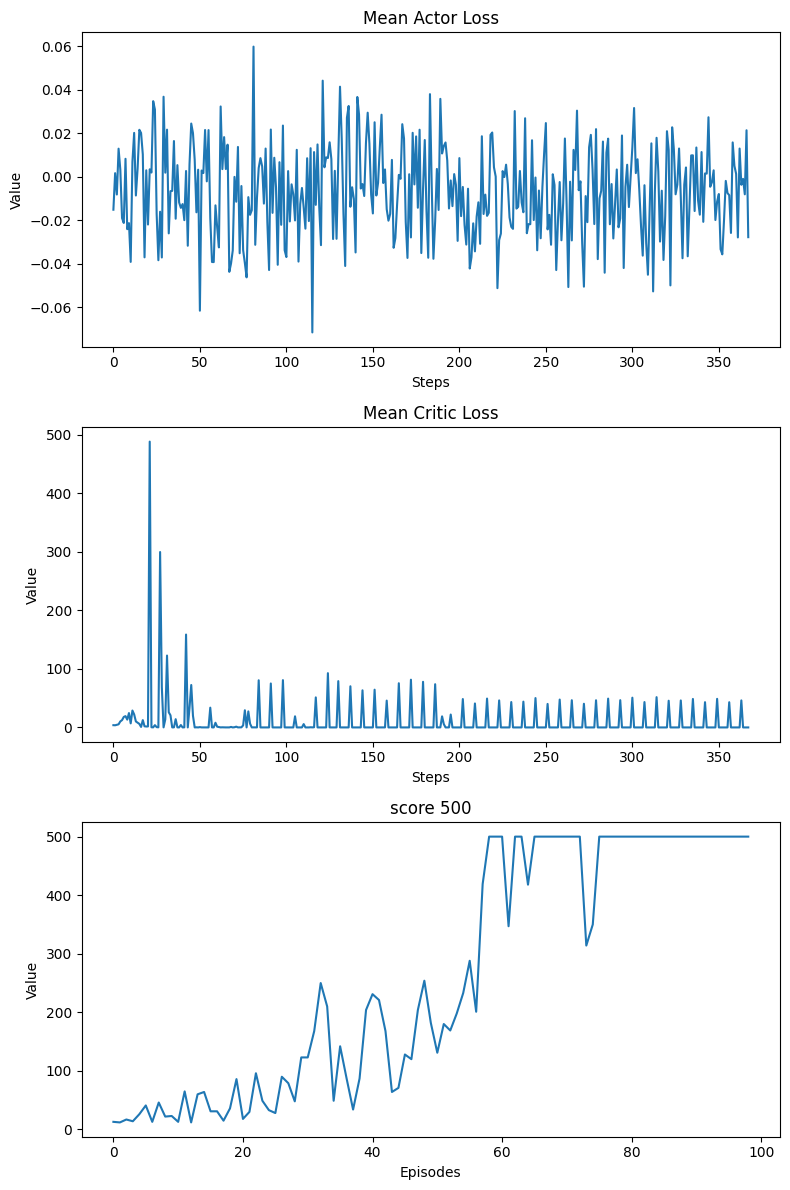

Training completed after 100 episodes


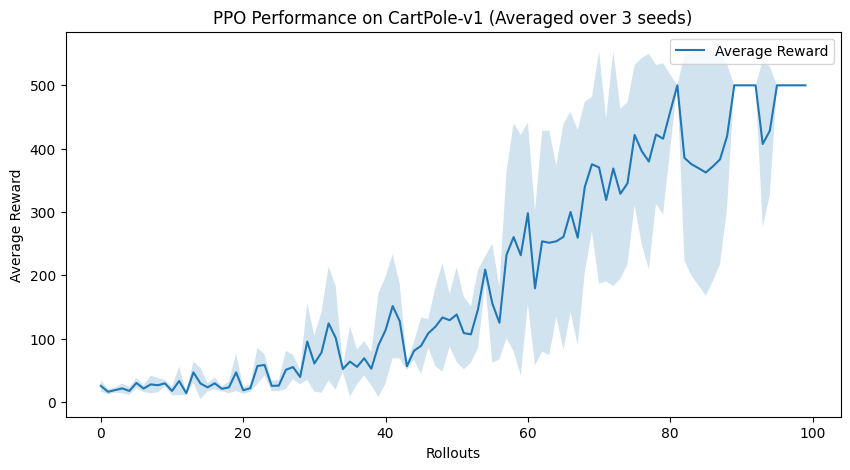

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def make_env(seed=25):
    env_id = "CartPole-v1"
    env = gym.make(env_id)
    if seed is not None:
        env.seed(seed)
        env.action_space.seed(seed)
        env.observation_space.seed(seed)
    return env

def train_agent(seed):
    np.random.seed(seed)
    env = make_env(seed)
    agent = PPOAgent(
        make_env,
        obs_dim=4,
        act_dim=env.action_space.n,
        gamma=0.99,
        lamda=0.95,
        entropy_coef=0.005,
        epsilon=0.2,
        vf_coef=0.1,
        rollout_len=25,
        total_rollouts=3000,
        num_epochs=10,
        batch_size=4,
        continuous=False,
        solved_reward=500,
        actor_lr=5e-4,
        critic_lr=3e-4,
    )
    agent.train()
    scores=agent.scores
    if scores is None:
        print(f"Training failed for seed {seed}.")
    return scores

def run_experiment(seeds):
    all_scores = []
    for seed in seeds:
        scores = train_agent(seed)
        if scores is not None:
            all_scores.append(scores)
        else:
            print(f"Skipping seed {seed} due to None rewards.")
    
    if len(all_scores) == 0:
        raise ValueError("No valid training results obtained. All rewards are None.")
    
    all_scores = np.array(all_scores)
    avg_scores = np.mean(all_scores, axis=0)
    std_scores = np.std(all_scores, axis=0)
    
    return avg_scores, std_scores

# Run the experiment with multiple seeds
seeds = [0, 1, 2]
avg_scores, std_scores = run_experiment(seeds)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(avg_scores, label='Average Reward')
plt.fill_between(range(len(avg_scores)), avg_scores - std_scores, avg_scores + std_scores, alpha=0.2)
plt.xlabel('Rollouts')
plt.ylabel('Average Reward')
plt.title('PPO Performance on CartPole-v1 (Averaged over 3 seeds)')
plt.legend()
plt.show()


In [6]:
import pandas as pd

# Define the data
data = {
    'Rollouts': np.arange(len(avg_scores)),
    'Average Reward': avg_scores,
    'Standard Deviation': std_scores
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = 'ppo_cartpole_results_averaged.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
# Testing the environment with reward modified
def make_env():
    env_id = "Cartpole-v1"
    env = gym.make(env_id)
    return env 

agent = PPOAgent(
    make_env,
    obs_dim=2,
    act_dim=3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef=0.005,
    epsilon=0.2,  # Higher epsilon for larger policy update steps
    vf_coef=0.1,  # Reduced value function coefficient
    rollout_len=25,  # Reduced rollout length
    total_rollouts=300,
    num_epochs=10,  # Reduced number of epochs
    batch_size=4,  # Smaller batch size
    continuous=False,
    solved_reward=500,
    actor_lr=5e-4,  # Higher learning rate for the actor
    critic_lr=3e-4,  # Higher learning rate for the critic
) 

agent.train()

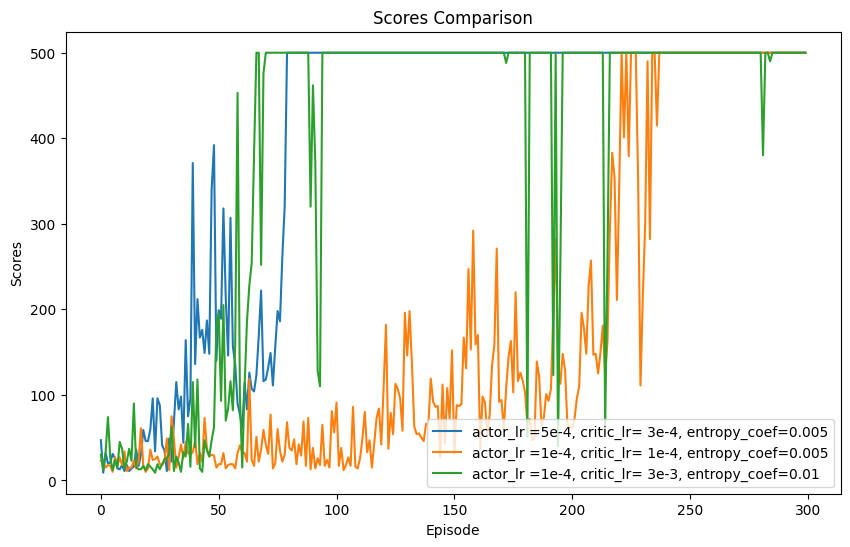

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = 'PPO\GRAPHE\CartpoleV1\Scores1-3.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Step 2: Extract columns
scores = data[['Score1', 'Score2', 'Score3']]

# Define labels for each score
labels = [
    "actor_lr =5e-4, critic_lr= 3e-4, entropy_coef=0.005",
    "actor_lr =1e-4, critic_lr= 1e-4, entropy_coef=0.005",
    "actor_lr =1e-4, critic_lr= 3e-3, entropy_coef=0.01",
]

# Step 3: Plot the values
plt.figure(figsize=(10, 6))
for column, label in zip(scores.columns, labels):
    plt.plot(scores.index, scores[column], label=label)

# Add titles and labels
plt.title('Scores Comparison')
plt.xlabel('Episode')
plt.ylabel('Scores')
plt.legend(loc='lower right')  # Move legend to the lower left

# Show plot
plt.show()


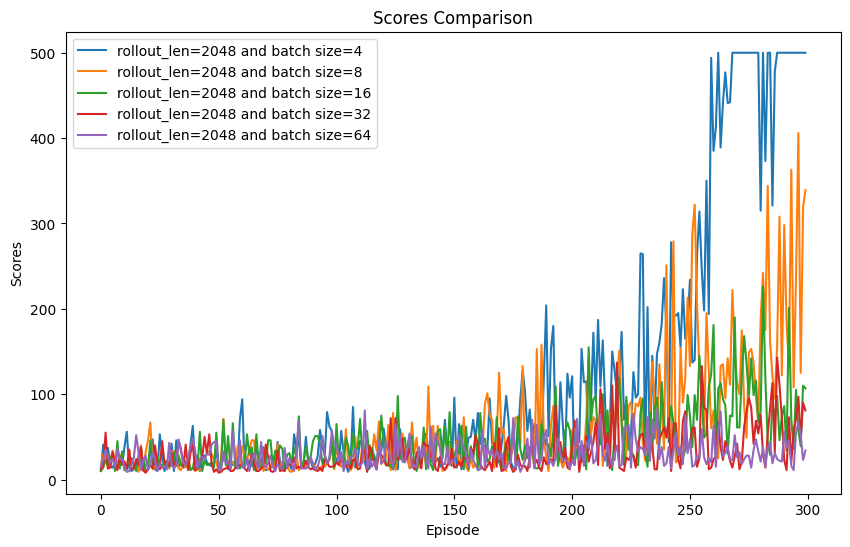

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = 'PPO\GRAPHE\CartpoleV1\Scores4-9.csv'  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Step 2: Extract columns
scores = data[['Score4', 'Score5', 'Score6', 'Score7', 'Score8']]

# Define labels for each score
labels = [
    "rollout_len=2048 and batch size=4",
    "rollout_len=2048 and batch size=8",
    "rollout_len=2048 and batch size=16",
    "rollout_len=2048 and batch size=32",
    "rollout_len=2048 and batch size=64"
]

# Step 3: Plot the values
plt.figure(figsize=(10, 6))
for column, label in zip(scores.columns, labels):
    plt.plot(scores.index, scores[column], label=label)

# Add titles and labels
plt.title('Scores Comparison')
plt.xlabel('Episode')
plt.ylabel('Scores')
plt.legend()

# Show plot
plt.show()


### MountainCarContinuous-v0

score1: entropy=0.003, vf_coef=0.5, rollout=1000, num_epochs=64, batch=512, 1e-3, 5e-3
score2: entropy=0.003, vf_coef=0.5, rollout=1000, num_epochs=64, batch=256, 1e-3, 5e-3
score3: entropy=0.003, vf_coef=0.5, rollout=1000, num_epochs=64, batch=128, 1e-3, 5e-3
score4: entropy=0.01, vf_coef=0.5, rollout=1000, num_epochs=10, batch=64, 1e-3, 1e-3
score5: entropy=0.01, vf_coef=0.5, rollout=256, num_epochs=10, batch=16, 1e-1, 1e-1
score6: entropy=0.01, vf_coef=0.5, rollout=256, num_epochs=10, batch=64, 1e-3, 5e-2

In [ ]:
# Testing the environment with reward modified
def make_env():
    env_id = "MountainCarContinuous-v0"
    env = gym.make(env_id)
    return env 

agent = PPOAgent(
    make_env,
    obs_dim=2,
    act_dim=3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef=0.01,
    epsilon=0.2,  # Higher epsilon for larger policy update steps
    vf_coef=0.5,  # Reduced value function coefficient
    rollout_len=256,  # Reduced rollout length
    total_rollouts=500,
    num_epochs=10,  # Reduced number of epochs
    batch_size=64,  # Smaller batch size
    continuous=True,
    solved_reward=92,
    actor_lr=1e-3,  # Higher learning rate for the actor
    critic_lr=5e-2,  # Higher learning rate for the critic
) #Score6

agent.train()

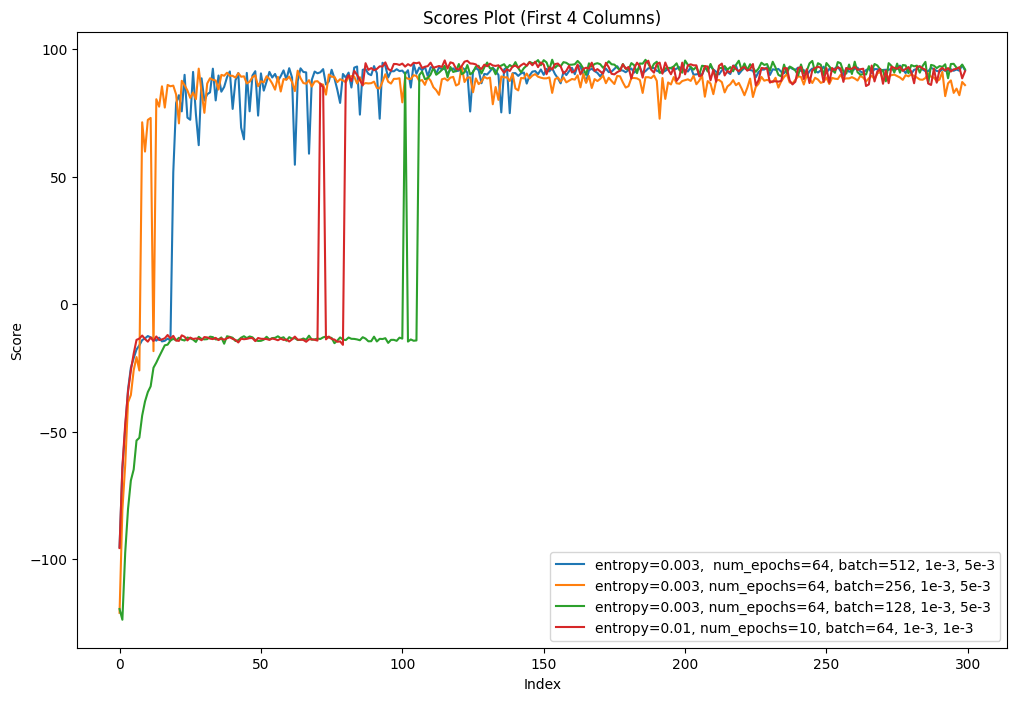

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file
merged_df = pd.read_csv('PPO\GRAPHE\MountainCountinousV1\merged_scores_Mountain_carContinious.csv')

# Define labels for each score
labels = [
    "entropy=0.003,  num_epochs=64, batch=512, 1e-3, 5e-3",
    "entropy=0.003, num_epochs=64, batch=256, 1e-3, 5e-3",
    "entropy=0.003, num_epochs=64, batch=128, 1e-3, 5e-3",
    "entropy=0.01, num_epochs=10, batch=64, 1e-3, 1e-3"
]

# Plotting the first 4 score columns with labels
plt.figure(figsize=(12, 8))
for column, label in zip(merged_df.columns[:4], labels):
    plt.plot(merged_df.index, merged_df[column], label=label)

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Scores Plot (First 4 Columns)')
plt.legend()
plt.show()


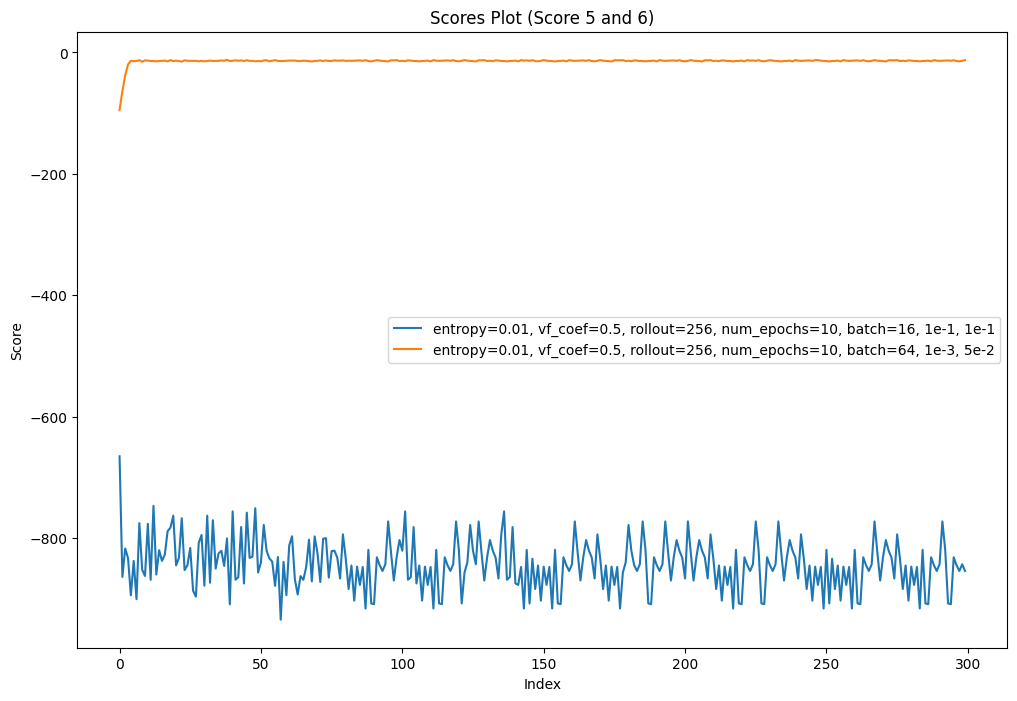

In [14]:
# Load the newly uploaded CSV file
merged_df = pd.read_csv('PPO\GRAPHE\MountainCountinousV1\merged_scores_Mountain_carContinious.csv')

# Plotting score5 and score6 with their respective labels
latest_labels_score5_6 = [
    "entropy=0.01, vf_coef=0.5, rollout=256, num_epochs=10, batch=16, 1e-1, 1e-1",
    "entropy=0.01, vf_coef=0.5, rollout=256, num_epochs=10, batch=64, 1e-3, 5e-2"
]

# Plotting the score5 and score6 columns with labels
plt.figure(figsize=(12, 8))
for column, label in zip(merged_df.columns[4:6], latest_labels_score5_6):
    plt.plot(merged_df.index, merged_df[column], label=label)

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Scores Plot (Score 5 and 6)')
plt.legend()
plt.show()


### Acrobot-v1

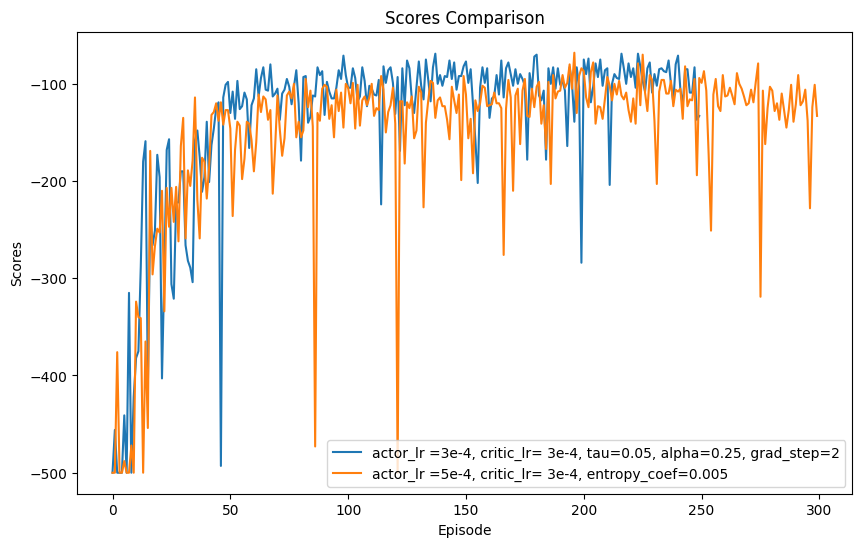

In [8]:
#graph of best parameters PPO and SAC

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = "Common Plots\Acrobot1_sac_ppo.csv"  # Adjust this path as necessary
data = pd.read_csv(file_path)

# Step 2: Extract columns
scores = data[['scoreSAC', 'scorePPO']]

# Define labels for each score
labels = [
    "actor_lr =3e-4, critic_lr= 3e-4, tau=0.05, alpha=0.25, grad_step=2",
    "actor_lr =5e-4, critic_lr= 3e-4, entropy_coef=0.005",
]

# Step 3: Plot the values
plt.figure(figsize=(10, 6))
for column, label in zip(scores.columns, labels):
    plt.plot(scores.index, scores[column], label=label)

# Add titles and labels
plt.title('Scores Comparison')
plt.xlabel('Episode')
plt.ylabel('Scores')
plt.legend(loc='lower right')  # Move legend to the lower left

# Show plot
plt.show()


dimensions network 64

score1: ntropy_coef = 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 64, num_epochs = 12, batch_size = 32,actor_lr = 1e-3, critic_lr = 5e-4

score2: score1: entropy_coef = 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 64, num_epochs = 12, batch_size = 32,actor_lr = 1e-3, critic_lr = 1e-3

score3: entropy_coef = 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 1028, num_epochs = 12, batch_size = 32,actor_lr = 1e-3, critic_lr = 1e-3

score4: 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 1028, num_epochs = 10, batch_size = 8,actor_lr = 1e-3, critic_lr = 5e-4

score5: 0.01, epsilon = 0.2, vf_coef = 0.5, rollout_len = 512, num_epochs = 10, batch_size = 16,actor_lr = 1e-4, critic_lr = 5e-4

score6: 0.005, epsilon = 0.2, vf_coef = 0.5, rollout_len = 512, num_epochs = 10, batch_size = 16,actor_lr = 1e-4, critic_lr = 5e-4

score7: 0.005, epsilon = 0.2, vf_coef = 0.5, rollout_len = 512, num_epochs = 10, batch_size = 16,actor_lr = 1e-4, critic_lr = 5e-4


In [ ]:
def make_env():
    # environment
    env_id = "Acrobot-v1"
    env = gym.make(env_id)
    return env

agent = PPOAgent(
    make_env,
    obs_dim = 6,
    act_dim = 3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef = 0.005,
    epsilon = 0.2,
    vf_coef = 0.5,
    rollout_len = 512,
    total_rollouts = 4000,
    num_epochs = 10,
    batch_size = 16,
    continuous = False,
    solved_reward = -80,
    actor_lr = 1e-4,
    critic_lr = 5e-4,
    plot_interval=1
)

agent.train()

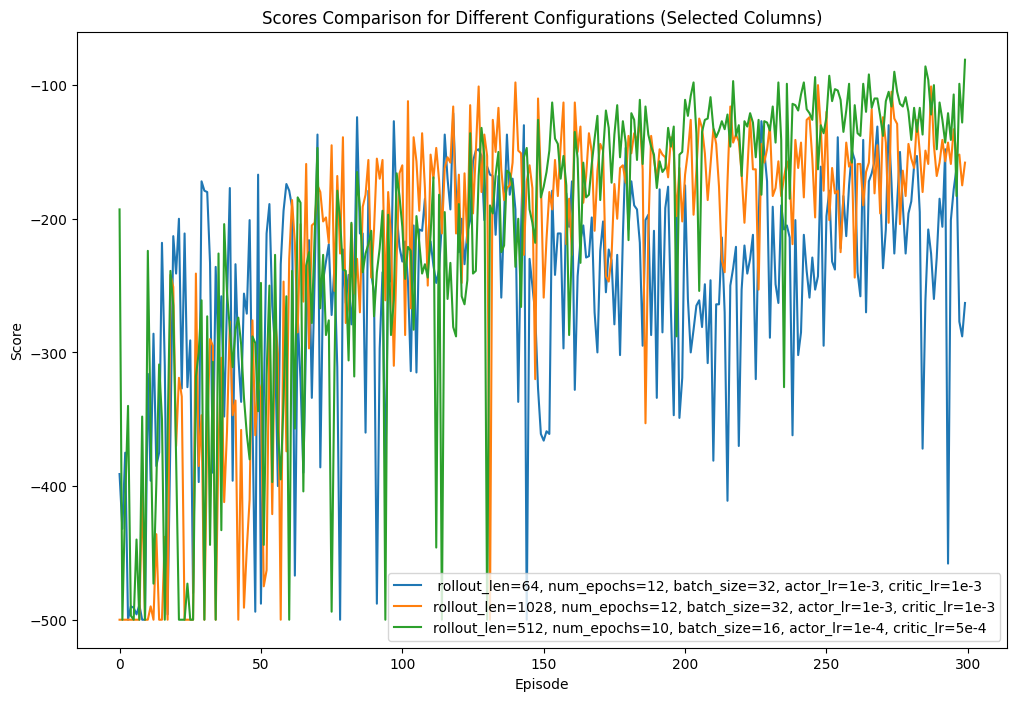

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV file
combined_scores = pd.read_csv('PPO\GRAPHE\AcrobotV1\Combined_Scores_Acrobot.csv')

# Define the labels for each score
labels = [
    " rollout_len=64, num_epochs=12, batch_size=32, actor_lr=1e-3, critic_lr=5e-4",
    " rollout_len=64, num_epochs=12, batch_size=32, actor_lr=1e-3, critic_lr=1e-3",
    "rollout_len=1028, num_epochs=12, batch_size=32, actor_lr=1e-3, critic_lr=1e-3",
    "rollout_len=1028, num_epochs=10, batch_size=8, actor_lr=1e-3, critic_lr=5e-4",
    "rollout_len=512, num_epochs=10, batch_size=16, actor_lr=1e-4, critic_lr=5e-4",
    "rollout_len=512, num_epochs=10, batch_size=16, actor_lr=1e-4, critic_lr=5e-4"
]

# Plotting the scores with labels for columns 1, 2, and 4
plt.figure(figsize=(12, 8))

columns_to_plot = [1, 2, 4]
for i in columns_to_plot:
    plt.plot(combined_scores.index, combined_scores.iloc[:, i], label=labels[i])

plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Scores Comparison for Different Configurations (Selected Columns)')
plt.legend()
plt.show()


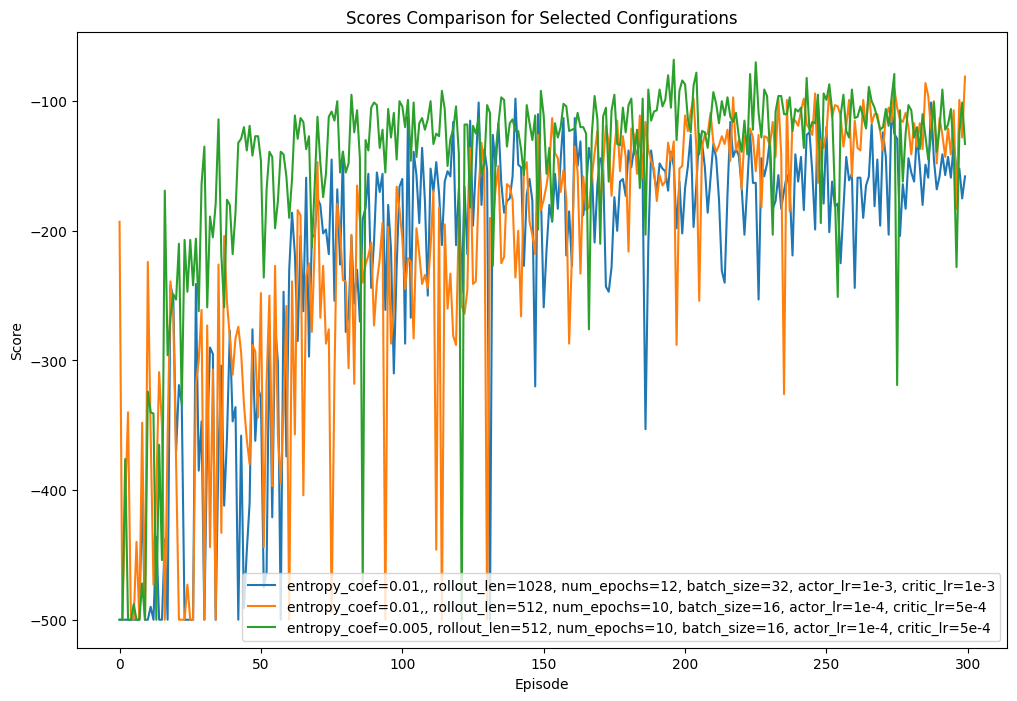

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV file
combined_scores = pd.read_csv('PPO\GRAPHE\AcrobotV1\Combined_Scores_Acrobot.csv')

# Plot the 3rd, 5th, and 6th columns with labels
plt.figure(figsize=(12, 8))

selected_columns = ['Score3', 'Score5', 'Score6']
selected_labels = [
    "entropy_coef=0.01,, rollout_len=1028, num_epochs=12, batch_size=32, actor_lr=1e-3, critic_lr=1e-3",
    "entropy_coef=0.01,, rollout_len=512, num_epochs=10, batch_size=16, actor_lr=1e-4, critic_lr=5e-4",
    "entropy_coef=0.005, rollout_len=512, num_epochs=10, batch_size=16, actor_lr=1e-4, critic_lr=5e-4"
]

for column, label in zip(selected_columns, selected_labels):
    plt.plot(combined_scores.index, combined_scores[column], label=label)

plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Scores Comparison for Selected Configurations')
plt.legend()
plt.show()


### Pendulum-v1

Score1: avec Normalizer
    entropy_coef = 0.005,
    epsilon = 0.2,
    vf_coef= 0.5,
    rollout_len = 2048,
    total_rollouts = 300,
    num_epochs = 25,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,

Score2: 
    entropy_coef = 0.01,
    epsilon = 0.2,
    vf_coef= 1.0,
    rollout_len = 2048,
    total_rollouts = 300,
    num_epochs = 25,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,
    
Score 3:
    entropy_coef = 0.01,
    epsilon = 0.2,
    vf_coef= 1.0,
    rollout_len = 512,
    total_rollouts = 300,
    num_epochs = 10,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,

Score 4:
    entropy_coef = 0.01,
    epsilon = 0.2,
    vf_coef= 0.5,
    rollout_len = 4096,
    total_rollouts = 300,
    num_epochs = 10,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-5,
    critic_lr = 5e-5,



In [ ]:
#input dimensions are 64

def make_env():
    # environment
    env_id = "Pendulum-v1"
    env = gym.make(env_id)
    env = ActionNormalizer(env)
    return env

agent = PPOAgent(
    make_env,
    obs_dim = 3,
    act_dim = 1,
    gamma = 0.9,
    lamda = 0.95,
    entropy_coef = 0.005,
    epsilon = 0.2,
    vf_coef= 0.5,
    rollout_len = 2048,
    total_rollouts = 300,
    num_epochs = 25,
    batch_size = 64,
    solved_reward = -200,
    continuous = True,
    plot_interval = 1,
    actor_lr = 1e-4,
    critic_lr = 5e-4,
)

agent.train()

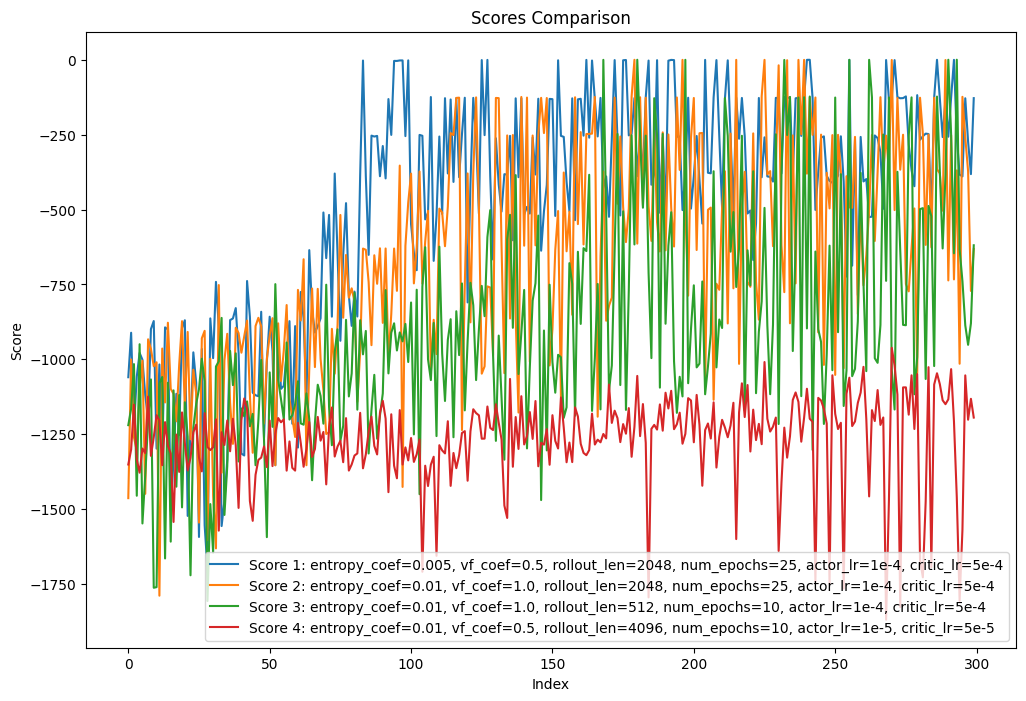

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'PPO\GRAPHE\PendulumV1\combined_scores_Pendulum.csv'
data = pd.read_csv(file_path)

# Define labels for each score
labels = [
    "Score 1: entropy_coef=0.005, vf_coef=0.5, rollout_len=2048, num_epochs=25, actor_lr=1e-4, critic_lr=5e-4",
    "Score 2: entropy_coef=0.01, vf_coef=1.0, rollout_len=2048, num_epochs=25, actor_lr=1e-4, critic_lr=5e-4",
    "Score 3: entropy_coef=0.01, vf_coef=1.0, rollout_len=512, num_epochs=10, actor_lr=1e-4, critic_lr=5e-4",
    "Score 4: entropy_coef=0.01, vf_coef=0.5, rollout_len=4096, num_epochs=10, actor_lr=1e-5, critic_lr=5e-5"
]

# Plotting the first 4 score columns with labels
plt.figure(figsize=(12, 8))
for column, label in zip(data.columns[:4], labels):
    plt.plot(data.index, data[column], label=label)

plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Scores Comparison')
plt.legend()
plt.show()


### Mountain-Car v0

In [ ]:
# Testing the environment with reward modified
def make_env():
    env_id = "MountainCar-v0"
    env = gym.make(env_id)
    return env 

agent = PPOAgent(
    make_env,
    obs_dim=2,
    act_dim=3,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef=0.003,
    epsilon=0.2,  # Higher epsilon for larger policy update steps
    vf_coef=0.5,  # Reduced value function coefficient
    rollout_len=256,  # Reduced rollout length
    total_rollouts=500,
    num_epochs=10,  # Reduced number of epochs
    batch_size=64,  # Smaller batch size
    continuous=False,
    solved_reward=92,
    actor_lr=1e-3,  # Higher learning rate for the actor
    critic_lr=5e-3,  # Higher learning rate for the critic
)

agent.train()

In [4]:
import csv

# Define the CSV file path
csv_file_path = 'score1.csv'

# Write the scores to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Score'])  # Write the header
    for score in score1:
        writer.writerow([score])

print(f'Scores have been saved to {csv_file_path}')


Scores have been saved to score1.csv


In [3]:
score1 = agent.scores